# Step 1: Data Preparation

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ssaic\AppData\Local\Temp\ipykernel_10908\3197174991.py:8: SyntaxWarning: invalid escape sequence '\P'
  image_folder = "E:\Project\DATA\Flicker8k_Dataset"


Total Images: 8091
Train Images: 5824
Validation Images: 648
Test Images: 1619
Images successfully organized into train (5824), val (648), and test (1619) folders.


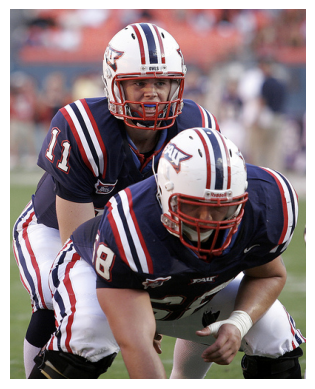

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil

# Path to images
image_folder = "E:\Project\DATA\Flicker8k_Dataset"

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

# Split dataset into Train (80%) and Test (20%)
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Further split Train into Train (90%) and Validation (10%)
train_files, val_files = train_test_split(train_files, test_size=0.1, random_state=42)

# Print dataset distribution
print(f"Total Images: {len(image_files)}")
print(f"Train Images: {len(train_files)}")
print(f"Validation Images: {len(val_files)}")
print(f"Test Images: {len(test_files)}")

# Define new directories
train_dir = os.path.join(image_folder, "train")
val_dir = os.path.join(image_folder, "val")
test_dir = os.path.join(image_folder, "test")

# Create directories if they don’t exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Function to move files to respective folders
def move_files(file_list, source_folder, dest_folder):
    for file_name in file_list:
        src_path = os.path.join(source_folder, file_name)
        dest_path = os.path.join(dest_folder, file_name)
        shutil.copy(src_path, dest_path)  # Use shutil.move() if you want to move instead of copy

# Move images into respective folders
move_files(train_files, image_folder, train_dir)
move_files(val_files, image_folder, val_dir)
move_files(test_files, image_folder, test_dir)

print(f"Images successfully organized into train ({len(train_files)}), val ({len(val_files)}), and test ({len(test_files)}) folders.")

# Verify by opening one image from Train set
img_path = os.path.join(train_dir, train_files[0])

try:
    img = Image.open(img_path)
    
    # Use Matplotlib for inline display
    plt.imshow(img)
    plt.axis("off")  # Hide axes for a clean look
    plt.show()
    
except FileNotFoundError:
    print(f"Error: Image {train_files[0]} not found!")
except Exception as e:
    print(f"Error loading image: {e}")


In [10]:
caption_file = "E:\Project\DATA\Flickr8k_text\\Flickr8k.token.txt"

from collections import defaultdict

# Load captions into a dictionary {image_name: [caption1, caption2, ...]}
captions_dict = defaultdict(list)

try:
    with open(caption_file, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) < 2:
                continue  # Skip malformed lines
            img_name, caption = parts[0].split("#")[0], parts[1]
            
            if img_name not in captions_dict:
                captions_dict[img_name] = []
            captions_dict[img_name].append(caption)

except FileNotFoundError:
    print(f"Error: Caption file {caption_file} not found!")
except Exception as e:
    print(f"Unexpected error reading captions: {e}")


# Print example
for img, captions in list(captions_dict.items())[:3]:  # Show first 3 image-caption pairs
    print(f"Image: {img}")
    for caption in captions:
        print(f" - {caption}")
    print("\n")  # Add spacing


Image: 1000268201_693b08cb0e.jpg
 - A child in a pink dress is climbing up a set of stairs in an entry way .
 - A girl going into a wooden building .
 - A little girl climbing into a wooden playhouse .
 - A little girl climbing the stairs to her playhouse .
 - A little girl in a pink dress going into a wooden cabin .


Image: 1001773457_577c3a7d70.jpg
 - A black dog and a spotted dog are fighting
 - A black dog and a tri-colored dog playing with each other on the road .
 - A black dog and a white dog with brown spots are staring at each other in the street .
 - Two dogs of different breeds looking at each other on the road .
 - Two dogs on pavement moving toward each other .


Image: 1002674143_1b742ab4b8.jpg
 - A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
 - A little girl is sitting in front of a large painted rainbow .
 - A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .
 - There is a gi

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ssaic\AppData\Local\Temp\ipykernel_10908\3116821371.py:1: SyntaxWarning: invalid escape sequence '\P'
  caption_file = "E:\Project\DATA\Flickr8k_text\\Flickr8k.token.txt"


In [11]:
import pickle


caption_file = "E:\\Project\\DATA\\Flickr8k_text\\Flickr8k.token.txt"

captions_dict = {}

with open(caption_file, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        img_name, caption = parts[0].split("#")[0], parts[1]

        if img_name not in captions_dict:
            captions_dict[img_name] = []
        captions_dict[img_name].append(caption)

# Save captions_dict to a pickle file
with open("captions.pkl", "wb") as f:
    pickle.dump(captions_dict, f)

print("Captions dictionary saved to 'captions.pkl'")


Captions dictionary saved to 'captions.pkl'


# Load and Preprocess Images

<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ssaic\AppData\Local\Temp\ipykernel_10908\1068296124.py:9: SyntaxWarning: invalid escape sequence '\P'
  image_folder = "E:\Project\DATA\Flicker8k_Dataset"  # Update if needed


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Feature vector shape: (2048,)


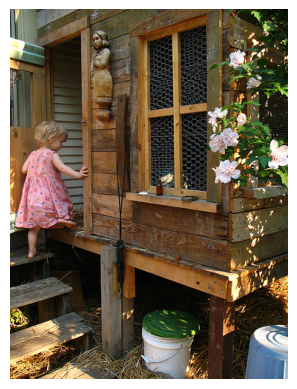

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define image folder path
image_folder = "E:\Project\DATA\Flicker8k_Dataset"  # Update if needed

# Load Pretrained InceptionV3 Model (without classification head)
base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Function to preprocess an image
def preprocess_image(image_path, model_name="inception"):
    img = load_img(image_path, target_size=(299, 299))  # Resize for InceptionV3
    img = img_to_array(img)  # Convert to NumPy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Apply InceptionV3 preprocessing
    return img

# Function to extract image features
def extract_features(image_path):
    img = preprocess_image(image_path)
    features = model.predict(img)
    return features.flatten()

# Test on a sample image
sample_image = os.path.join(image_folder, "1000268201_693b08cb0e.jpg")  # Change to any image
features = extract_features(sample_image)

# Show extracted features shape
print("Feature vector shape:", features.shape)

# Display sample image
img = load_img(sample_image)
plt.imshow(img)
plt.axis("off")
plt.show()


# **Extract and Save Features for All Images**
Since we need to use these image features later for training the image captioning model, we'll: ✅ Extract features for all images in the dataset.
✅ Store the extracted features in a dictionary {image_name: feature_vector}.
✅ Save this dictionary as a pickle file (features.pkl) for future use.